In [1]:
"""
Create dataset from directory
"""
import os

root = '/mnt/drive1/skripsi/'

workspace = os.path.join(root, 'training3')


In [2]:
"""
Read dataset from single .h5
"""

import h5py
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sys
from keras.utils import *


def initialize_data(dataset_file):
    f = h5py.File(dataset_file, 'r')
    image_dataset = []
    label_dataset = f['labels']
    for data in zip(f['images'], f['image_shapes']):
        image_dataset.append(data[0].reshape(data[1]))
    
    return image_dataset, label_dataset


def encode_label_alhpabet(arr):
    encoded_arr = np.zeros(len(arr)).astype(np.int32)
    for i, val in enumerate(arr, 0):
        if len(val) > 0:
            encoded_arr[i] = int(ord(val))-64
        else:
            encoded_arr[i] = 0
    return np.array(encoded_arr).astype(np.int32)


def encode_label_number(arr):
    encoded_arr = np.zeros(len(arr)).astype(np.int32)
    for i, val in enumerate(arr, 0):
        if len(val) > 0:
            encoded_arr[i] = int(float(val))+1
        else:
            encoded_arr[i] = 0
    return np.array(encoded_arr).astype(np.int32)


def encode_labels(labels):
    encoded_labels = []
    encoded_labels.append(np.array(labels[:, 0]).astype(np.int32))  # s1_0
    encoded_labels.append(encode_label_alhpabet(labels[:, 1]))  # s1_1
    encoded_labels.append(encode_label_alhpabet(labels[:, 2]))  # s1_2
    
    encoded_labels.append(np.array(labels[:, 3]).astype(np.int32))  # s2_0
    encoded_labels.append(encode_label_number(labels[:, 4]))  # s2_1
    encoded_labels.append(encode_label_number(labels[:, 5]))  # s2_2
    encoded_labels.append(encode_label_number(labels[:, 6]))  # s2_3
    encoded_labels.append(encode_label_number(labels[:, 7]))  # s2_4http://localhost:8888/?token=
    
    encoded_labels.append(np.array(labels[:, 8]).astype(np.int32))  # s3_0
    encoded_labels.append(encode_label_alhpabet(labels[:, 9]))  # s3_1
    encoded_labels.append(encode_label_alhpabet(labels[:, 10]))  # s3_2
    encoded_labels.append(encode_label_alhpabet(labels[:, 11]))  # s3_3
    
    return np.array(encoded_labels).T


def logitize_labels(labels):
    labels = np.array(labels)
    # Convert S2 labels to logits
    logits_s1_0 = np_utils.to_categorical(labels[:, 0], 3)
    logits_s1_1 = np_utils.to_categorical(labels[:, 1], 27)
    logits_s1_2 = np_utils.to_categorical(labels[:, 2], 27)
    s1_logits = np.hstack([logits_s1_0, logits_s1_1, logits_s1_2])
    
    # Convert S2 labels to logits
    logits_s2_0 = np_utils.to_categorical(labels[:, 3], 5) 
    logits_s2_1 = np_utils.to_categorical(labels[:, 4], 11) 
    logits_s2_2 = np_utils.to_categorical(labels[:, 5], 11) 
    logits_s2_3 = np_utils.to_categorical(labels[:, 6], 11) 
    logits_s2_4 = np_utils.to_categorical(labels[:, 7], 11)
    s2_logits = np.hstack([logits_s2_0, logits_s2_1, logits_s2_2, logits_s2_3, logits_s2_4])
    
    # Convert S3 labels to logits
    logits_s3_0 = np_utils.to_categorical(labels[:, 8], 4)
    logits_s3_1 = np_utils.to_categorical(labels[:, 9], 27)
    logits_s3_2 = np_utils.to_categorical(labels[:, 10], 27)
    logits_s3_3 = np_utils.to_categorical(labels[:, 11], 27)
    s3_logtis = np.hstack([logits_s3_0, logits_s3_1, logits_s3_2, logits_s3_3])
    
    return np.hstack([s1_logits, s2_logits, s3_logtis])


image_dataset, label_dataset = initialize_data(os.path.join(workspace, 'dataset.h5'))

# Encode label to number
encoded_labels = encode_labels(label_dataset)

# Logitize label
logitized_labels = logitize_labels(encoded_labels) 

# Testing
test_id = np.random.choice(len(image_dataset))
plt.imshow(image_dataset[test_id])
print(str(label_dataset[test_id]))
print(str(encoded_labels[test_id]))
print(str(logitized_labels[test_id]))

Using TensorFlow backend.


['1' 'H' '' '4' '5' '7' '6' '6.0' '2' 'J' 'Q' '']
[ 1  8  0  4  6  8  7  7  2 10 17  0]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


['2' 'A' 'D' '4' '2' '9' '8' '8.0' '2' 'V' 'O' '']
[ 2  1  4  4  3 10  9  9  2 22 15  0]
[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


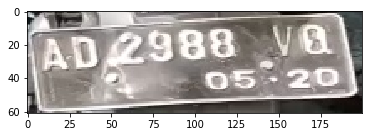

In [3]:
# Testing
test_id = np.random.choice(len(image_dataset))
plt.imshow(image_dataset[test_id])
print(str(label_dataset[test_id]))
print(encoded_labels[test_id])
print(logitized_labels[test_id])


In [6]:
"""
Convert image dataset to training and validation data
"""

train_dataset = image_dataset[0:1500]
train_labels = logitized_labels[0:1500]
valid_dataset = image_dataset[1501::]
valid_labels = logitized_labels[1501::]
train_labels[0]

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [7]:
"""
Image resizing
"""
import cv2 as cv2
input_dim = (200, 61)
def image_resizer(images, dim):
    i = 0
    resized_images = [] 
    for i, image in enumerate(images, i):
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)
        resized_images.append(resized_image)
    resized_images = np.array(resized_images)
    return resized_images

# Resize semua dataset untuk inferencing
train_dataset = image_resizer(train_dataset, input_dim)
valid_dataset = image_resizer(valid_dataset, input_dim)
train_dataset.shape

(1500, 61, 200, 3)

[2, 1, 4, 4, 6, 10, 2, 2, 2, 3, 19, 0]
s1 :  [2, 1, 4]
[0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
s2 :  [4, 6, 10, 2, 2]
[0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
s3 :  [2, 3, 19, 0]
[0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


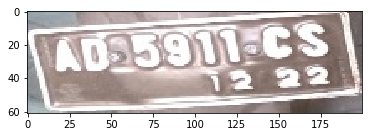

In [8]:

"""
Sanity Checking
"""
from matplotlib import pyplot as plt

label_helper = {'m_s1': slice(0, 3), 
                's1_1': slice(3, 30),
                's1_2': slice(30, 57),
                'm_s2': slice(57, 62),
                's2_1': slice(62, 73), 
                's2_2': slice(73, 84), 
                's2_3': slice(84, 95),
                's2_4': slice(95, 106),
                'm_s3': slice(106, 110), 
                's3_1': slice(110, 137),
                's3_2': slice(137, 164), 
                's3_3': slice(164, 191)}

def logits_decoder(label):
    # Convert label to readable character
    s1_0 = label[0:3]
    s1_1 = label[3:30]
    s1_2 = label[30:57]
    
    s2_0 = label[57:62]
    s2_1 = label[62:73]
    s2_2 = label[73:84]
    s2_3 = label[84:95]
    s2_4 = label[95:106]
    
    s3_0 = label[106:110]
    s3_1 = label[110:137]
    s3_2 = label[137:164]
    s3_3 = label[164:191]
    
    s1_0 = np.argmax(s1_0)
    s1_1 = np.argmax(s1_1)
    s1_2 = np.argmax(s1_2)
    
    s2_0 = np.argmax(s2_0)
    s2_1 = np.argmax(s2_1)
    s2_2 = np.argmax(s2_2)
    s2_3 = np.argmax(s2_3)
    s2_4 = np.argmax(s2_4)
    
    s3_0 = np.argmax(s3_0)
    s3_1 = np.argmax(s3_1)
    s3_2 = np.argmax(s3_2)
    s3_3 = np.argmax(s3_3)
    
    s1 = [s1_0, s1_1, s1_2]
    s2 = [s2_0, s2_1, s2_2, s2_3, s2_4]
    s3 = [s3_0, s3_1, s3_2, s3_3]
    return [s1_0, s1_1, s1_2, s2_0, s2_1, s2_2, s2_3, s2_4, s3_0, s3_1, s3_2, s3_3]


def label_decoder(label):
    """
    Label Decoder
    Output real value from the label
    e.g 'AE 2343 PY'
    """
    alphabet_dict = " ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    number_dict = " 0123456789"
    s1 = ''
    s1 += alphabet_dict[label[1]]
    s1 += alphabet_dict[label[2]]
    
    s2 = ''
    s2 += number_dict[label[4]]
    s2 += number_dict[label[5]]
    s2 += number_dict[label[6]]
    s2 += number_dict[label[7]]
    
    s3 = ''
    s3 += alphabet_dict[label[9]] 
    s3 += alphabet_dict[label[10]] 
    s3 += alphabet_dict[label[11]]
    
    return s1 + ' ' + s2 + ' ' + s3  


select = np.random.choice(len(train_dataset))
plt.imshow(train_dataset[select])
logitized_labels = train_labels
# print(train_labels[select])
# sys.exit()
print(logits_decoder(logitized_labels[select]))
# Check S1
print('s1 : ', str(logits_decoder(logitized_labels[select])[0:3]))
print(str(logitized_labels[select, label_helper['m_s1']]))
print(str(logitized_labels[select, label_helper['s1_1']]))
print(str(logitized_labels[select, label_helper['s1_2']]))

# Check S2
print('s2 : ', str(logits_decoder(logitized_labels[select])[3:8]))
print(str(logitized_labels[select, label_helper['m_s2']]))
print(str(logitized_labels[select, label_helper['s2_1']]))
print(str(logitized_labels[select, label_helper['s2_2']]))
print(str(logitized_labels[select, label_helper['s2_3']]))
print(str(logitized_labels[select, label_helper['s2_4']]))

# Check S3
print('s3 : ', str(logits_decoder(logitized_labels[select])[8:12]))
print(str(logitized_labels[select, label_helper['m_s3']]))
print(str(logitized_labels[select, label_helper['s3_1']]))
print(str(logitized_labels[select, label_helper['s3_2']]))
print(str(logitized_labels[select, label_helper['s3_3']]))


In [9]:

"""
Open Model
"""
# load json and create model
from keras.engine.saving import model_from_json

json_file = open(os.path.join(workspace, 'model_final.json'), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
# loaded_model.load_weights(os.path.join(workspace, "extractorz2_epoch-76_loss-0.9559_val_loss-2.1267.h5"))
print("Loaded model from disk")
# plot_model(loaded_model, show_shapes=True, to_file=os.path.join(dataset_dir, 'loaded_modelz5.jpg'))


Loaded model from disk


s1 :  2
[0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
s2 :  1
[0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
s3 :  4
[0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


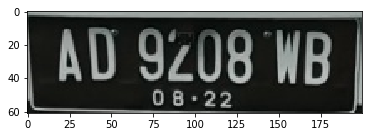

In [10]:
"""
Data Generator
"""

import cv2 as cv2
model_input_dim = (200, 61)
def image_resizer(im, dim):
    image = cv2.resize(im, dim, interpolation=cv2.INTER_LINEAR)
    return image

def generator(dataset, labels, batch_size):
    dataset = np.array(dataset)
    # Create container for features and labels
    batch_dataset = np.zeros((batch_size, 61, 200, 3))
    batch_labels = np.zeros((batch_size, 191))
    
    while True:
        for i in range(batch_size):
            ii = np.random.choice(len(dataset), 1)[0]
            batch_dataset[i] = image_resizer(dataset[ii], (200, 61))
            batch_labels[i] = labels[ii]
        yield batch_dataset, batch_labels 
        

# Testing generator
train_generator = generator(train_dataset, train_labels, 10)
batch_train_dataset, batch_train_labels = next(train_generator)

select = 1 
plt.imshow(np.array(batch_train_dataset[select]).astype(np.uint8))
# Check S1
print('s1 : ', str(logits_decoder(batch_train_labels[select])[0]))
print(str(batch_train_labels[select, label_helper['m_s1']]))
print(str(batch_train_labels[select, label_helper['s1_1']]))
print(str(batch_train_labels[select, label_helper['s1_2']]))

# Check S2
print('s2 : ', str(logits_decoder(batch_train_labels[select])[1]))
print(str(batch_train_labels[select, label_helper['m_s2']]))
print(str(batch_train_labels[select, label_helper['s2_1']]))
print(str(batch_train_labels[select, label_helper['s2_2']]))
print(str(batch_train_labels[select, label_helper['s2_3']]))
print(str(batch_train_labels[select, label_helper['s2_4']]))

# Check S3
print('s3 : ', str(logits_decoder(batch_train_labels[select])[2]))
print(str(batch_train_labels[select, label_helper['m_s3']]))
print(str(batch_train_labels[select, label_helper['s3_1']]))
print(str(batch_train_labels[select, label_helper['s3_2']]))
print(str(batch_train_labels[select, label_helper['s3_3']]))


In [11]:
"""
Define all the callbacks
"""

from keras.callbacks import *
checkpoint_filename = 'extractor_model-final3_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5'
model_checkpoint = ModelCheckpoint(filepath=os.path.join(workspace, checkpoint_filename),
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)
logger_filename = 'extractor_model-final3_training_log.csv'
csv_logger = CSVLogger(filename=os.path.join(workspace, logger_filename),
                       separator=',',
                       append=True)

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.0,
                               patience=10,
                               verbose=1)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.2,
                                         patience=8,
                                         verbose=1,
                                         min_delta=0.001,
                                         cooldown=0,
                                         min_lr=0.00001)

def telegram_notify(epoch, logs):
    root = 'https://api.telegram.org'
    path = '/bot667052156:AAFRQdHUTHVIQRc2s3lQNdh2PaZnVp38PyE/sendMessage'
    try:
        requests.post(root+path, json={'chat_id': '@satya24_skripsi', 'text': 'extractor_model-final. \nEpoch: ' + str(epoch) + ' => ' + str(logs)})
    except Exception as e:
        print('Connection Error...')
        pass

remote_monitor = LambdaCallback(
    on_epoch_end = lambda epoch, logs:
        telegram_notify(epoch, logs)
)
callbacks = [model_checkpoint,
             csv_logger,
             early_stopping,
             reduce_learning_rate,
             remote_monitor]


In [12]:
"""
Plate Loss function
"""

from keras import backend as K
from keras.optimizers import SGD

def plate_loss(y_true, y_pred):
    loss_s1_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s1']], y_pred[:, label_helper['m_s1']]))
    loss_s1_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s1_1']], y_pred[:, label_helper['s1_1']]))
    loss_s1_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s1_2']], y_pred[:, label_helper['s1_2']]))
    
    loss_s2_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s2']], y_pred[:, label_helper['m_s2']]))
    loss_s2_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_1']], y_pred[:, label_helper['s2_1']]))
    loss_s2_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_2']], y_pred[:, label_helper['s2_2']]))
    loss_s2_3 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_3']], y_pred[:, label_helper['s2_3']]))
    loss_s2_4 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_4']], y_pred[:, label_helper['s2_4']]))
    
    loss_s3_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s3']], y_pred[:, label_helper['m_s3']]))
    loss_s3_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_1']], y_pred[:, label_helper['s3_1']]))
    loss_s3_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_2']], y_pred[:, label_helper['s3_2']]))
    loss_s3_3 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_3']], y_pred[:, label_helper['s3_3']]))
    
    loss_s1 = loss_s1_0 + loss_s1_1 + loss_s1_2
    loss_s2 = loss_s2_0 + loss_s2_1 + loss_s2_2 + loss_s2_3 + loss_s2_4
    loss_s3 = loss_s3_0 + loss_s3_1 + loss_s3_2 + loss_s3_3
    return loss_s1 + loss_s2 + loss_s3

def character_acc2(y_true, y_pred):
    s1_0 = K.equal(K.argmax(y_true[:, label_helper['m_s1']]), K.argmax(y_pred[:, label_helper['m_s1']]))
    s1_1 = K.equal(K.argmax(y_true[:, label_helper['s1_1']]), K.argmax(y_pred[:, label_helper['s1_1']]))
    s1_2 = K.equal(K.argmax(y_true[:, label_helper['s1_2']]), K.argmax(y_pred[:, label_helper['s1_2']]))
    
    s2_0 = K.equal(K.argmax(y_true[:, label_helper['m_s2']]), K.argmax(y_pred[:, label_helper['m_s2']]))
    s2_1 = K.equal(K.argmax(y_true[:, label_helper['s2_1']]), K.argmax(y_pred[:, label_helper['s2_1']]))
    s2_2 = K.equal(K.argmax(y_true[:, label_helper['s2_2']]), K.argmax(y_pred[:, label_helper['s2_2']]))
    s2_3 = K.equal(K.argmax(y_true[:, label_helper['s2_3']]), K.argmax(y_pred[:, label_helper['s2_3']]))
    s2_4 = K.equal(K.argmax(y_true[:, label_helper['s2_4']]), K.argmax(y_pred[:, label_helper['s2_4']]))
    
    s3_0 = K.equal(K.argmax(y_true[:, label_helper['m_s3']]), K.argmax(y_pred[:, label_helper['m_s3']]))
    s3_1 = K.equal(K.argmax(y_true[:, label_helper['s3_1']]), K.argmax(y_pred[:, label_helper['s3_1']]))
    s3_2 = K.equal(K.argmax(y_true[:, label_helper['s3_2']]), K.argmax(y_pred[:, label_helper['s3_2']]))
    s3_3 = K.equal(K.argmax(y_true[:, label_helper['s3_3']]), K.argmax(y_pred[:, label_helper['s3_3']]))
    
    s1 = K.mean(s1_0) + K.mean(s1_1) + K.mean(s1_2)
    s2 = K.mean(s2_0) + K.mean(s2_1) + K.mean(s2_2) + K.mean(s2_3) + K.mean(s2_4)
    s3 = K.mean(s3_0) + K.mean(s3_1) + K.mean(s3_2) + K.mean(s3_3)
    # return (K.mean(s1_1) + K.mean(s1_2) + K.mean(s2_1) + K.mean(s2_2) + K.mean(s2_3) + K.mean(s2_4) + K.mean(s3_1) + K.mean(s3_2) + K.mean(s3_3)) / 9
    return (s1+s2+s3)/12
"""
Compile Model
"""
loaded_model.compile(optimizer=SGD(lr=0.001, momentum=0.8), loss=plate_loss, metrics=[character_acc2])


In [13]:
"""
Train model
"""
initial_epoch = 0
final_epoch = 20
steps_per_epoch = 2000
train_generator = generator(train_dataset, train_labels, 5)
val_generator = generator(valid_dataset, valid_labels, 5)
history = loaded_model.fit_generator(generator=train_generator,
                                  steps_per_epoch=steps_per_epoch, 
                                  epochs=final_epoch, 
                                  callbacks=callbacks,
                                  validation_data=val_generator,
                                  validation_steps=60,
                                  initial_epoch=initial_epoch) 


Epoch 1/20
 164/2000 [=>............................] - ETA: 10:11 - loss: 22.3863 - character_acc2: 0.4419

KeyboardInterrupt: 

In [15]:
"""
Continue training model
Dipake juga buat retrain ke data asli
Diwoco sek su 
"""
weight_file = 'extractor_model-final_epoch-65_loss-1.2017_val_loss-0.6581.h5'
loaded_model.load_weights(os.path.join(workspace, weight_file))
loaded_model.compile(optimizer=SGD(lr=0.001, momentum=0.8), loss=plate_loss, metrics=[character_acc2])
"""
Train model
"""
initial_epoch = 0
final_epoch = 50
steps_per_epoch = 300
train_generator = generator(train_dataset, train_labels, 5)
val_generator = generator(valid_dataset, valid_labels, 5)
history = loaded_model.fit_generator(generator=train_generator,
                                  steps_per_epoch=steps_per_epoch, 
                                  epochs=final_epoch, 
                                  callbacks=callbacks,
                                  validation_data=val_generator,
                                  validation_steps=60,
                                  initial_epoch=initial_epoch) 

Epoch 1/50
300/300 [==============================] - 91s 302ms/step - loss: 6.1959 - character_acc2: 0.8669 - val_loss: 27.7783 - val_character_acc2: 0.6403

Epoch 00001: val_loss improved from inf to 27.77830, saving model to /mnt/drive1/skripsi/training3/extractor_model-final3_epoch-01_loss-6.1959_val_loss-27.7783.h5
Connection Error...
Epoch 2/50
300/300 [==============================] - 83s 276ms/step - loss: 5.5552 - character_acc2: 0.8981 - val_loss: 9.7626 - val_character_acc2: 0.8525

Epoch 00002: val_loss improved from 27.77830 to 9.76257, saving model to /mnt/drive1/skripsi/training3/extractor_model-final3_epoch-02_loss-5.5552_val_loss-9.7626.h5
Epoch 3/50
300/300 [==============================] - 82s 275ms/step - loss: 3.4498 - character_acc2: 0.9346 - val_loss: 4.9442 - val_character_acc2: 0.8972

Epoch 00003: val_loss improved from 9.76257 to 4.94424, saving model to /mnt/drive1/skripsi/training3/extractor_model-final3_epoch-03_loss-3.4498_val_loss-4.9442.h5
Epoch 4/50


Connection Error...
Epoch 34/50
300/300 [==============================] - 81s 269ms/step - loss: 1.1306 - character_acc2: 0.9914 - val_loss: 1.8822 - val_character_acc2: 0.9667

Epoch 00034: val_loss did not improve from 1.38508
Epoch 35/50
300/300 [==============================] - 82s 273ms/step - loss: 1.3180 - character_acc2: 0.9899 - val_loss: 1.4715 - val_character_acc2: 0.9708

Epoch 00035: val_loss did not improve from 1.38508
Epoch 36/50
300/300 [==============================] - 82s 272ms/step - loss: 0.8260 - character_acc2: 0.9939 - val_loss: 1.3432 - val_character_acc2: 0.9736

Epoch 00036: val_loss improved from 1.38508 to 1.34318, saving model to /mnt/drive1/skripsi/training3/extractor_model-final3_epoch-36_loss-0.8260_val_loss-1.3432.h5
Epoch 37/50
300/300 [==============================] - 82s 272ms/step - loss: 0.6888 - character_acc2: 0.9952 - val_loss: 1.4530 - val_character_acc2: 0.9739

Epoch 00037: val_loss did not improve from 1.34318
Epoch 38/50
300/300 [=====

[1, 11, 0, 4, 6, 9, 9, 5, 2, 19, 18, 0]
K  5884 SR 


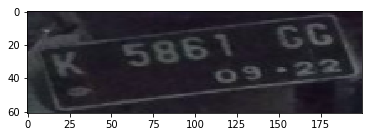

In [19]:
"""
Predict single image
"""
i = 45
x_single = x[i]
x_gray = cv2.cvtColor(x[i], cv2.COLOR_BGR2GRAY) 
x_gray = cv2.cvtColor(x_gray, cv2.COLOR_GRAY2BGR) 
y = loaded_model.predict(np.expand_dims(x_single, 0))
print(logits_decoder(y[0]))
print(label_decoder(logits_decoder(y[0])))
plt.imshow(x_single)
plt.show()